In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

## Load Census Dataset

In [2]:
cols =['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','annual_income']

In [3]:
cendf = pd.read_csv(r"C:\Users\tharu\Downloads\adult (1).data",names = cols,skipinitialspace=True)

In [4]:
cendf.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## EDA

In [5]:
cendf.shape

(32561, 15)

In [6]:
cendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
for i in cols:
    if cendf[i].dtype == 'object':
        print(pd.DataFrame(cendf[i].value_counts()))

                  count
workclass              
Private           22696
Self-emp-not-inc   2541
Local-gov          2093
?                  1836
State-gov          1298
Self-emp-inc       1116
Federal-gov         960
Without-pay          14
Never-worked          7
              count
education          
HS-grad       10501
Some-college   7291
Bachelors      5355
Masters        1723
Assoc-voc      1382
11th           1175
Assoc-acdm     1067
10th            933
7th-8th         646
Prof-school     576
9th             514
12th            433
Doctorate       413
5th-6th         333
1st-4th         168
Preschool        51
                       count
marital-status              
Married-civ-spouse     14976
Never-married          10683
Divorced                4443
Separated               1025
Widowed                  993
Married-spouse-absent    418
Married-AF-spouse         23
                   count
occupation              
Prof-specialty      4140
Craft-repair        4099
Exec-managerial

### Data preprocessing

In [8]:
#from above we can see unknown values '?' in workclass,occupation and native-country
#repacing '?' with NA 
cendf =cendf.replace('?','NA')

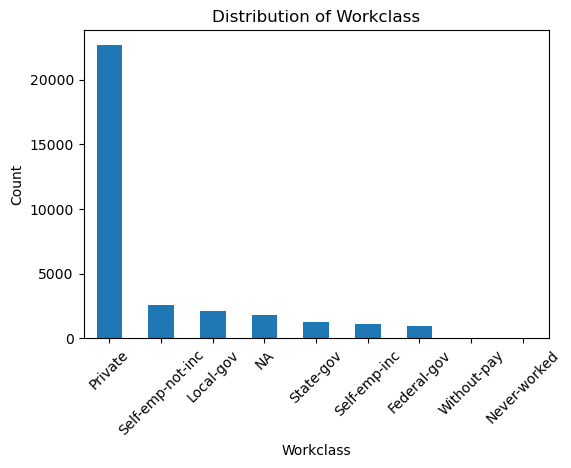

In [9]:
workclass_counts = cendf['workclass'].value_counts()

# Create a bar plot
plt.figure(figsize=(6,4))
workclass_counts.plot(kind='bar')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
cendf['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
NA                              583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [11]:
#missing values are very less so will drop those missing values
cendf.drop(cendf[cendf['workclass'] == 'NA'].index,inplace=True)

In [12]:
cendf.drop(cendf[cendf['native-country'] == 'NA'].index,inplace=True)

In [13]:
cendf.drop(cendf[cendf['occupation'] == 'NA'].index,inplace=True)

In [14]:
cendf.shape

(30162, 15)

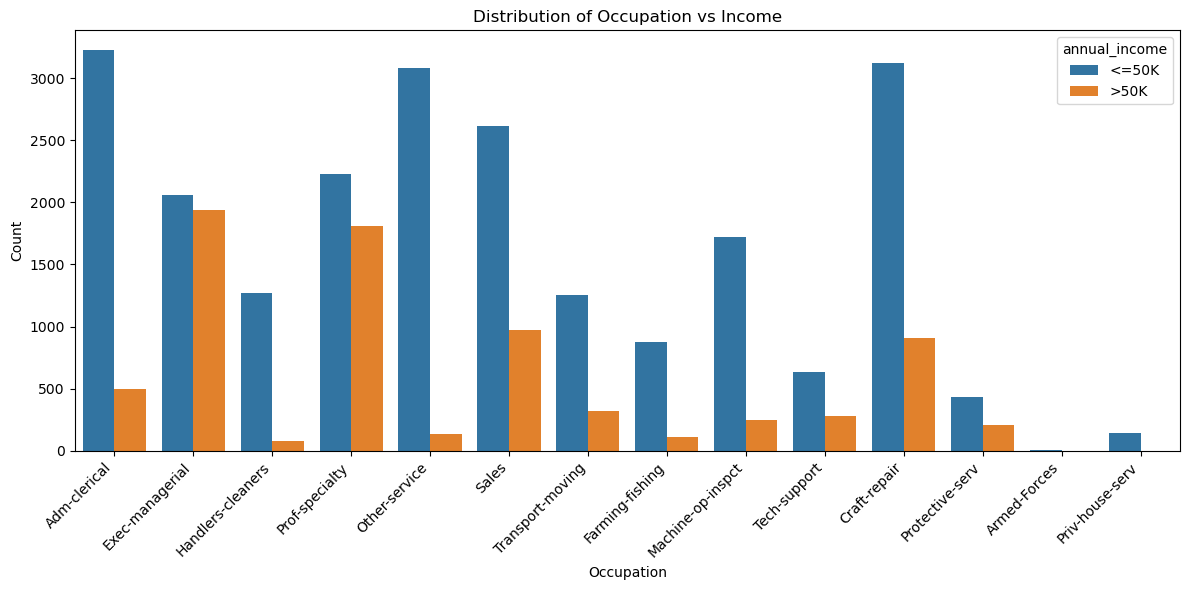

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='annual_income', data=cendf)
plt.title('Distribution of Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Data Manipulation

In [16]:
census_ed = cendf['education']
census_ed

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 30162, dtype: object

In [17]:
census_seq = cendf.iloc[:,:8]
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


In [18]:
cens_col = cendf.iloc[:,5:12:3]
cens_col

,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0
...,...,...,...
32556,Married-civ-spouse,White,0
32557,Married-civ-spouse,White,0
32558,Widowed,White,0
32559,Never-married,White,0


In [19]:
male_gov = cendf[(cendf['sex']=='Male')&(cendf['workclass'] == 'State-gov')]
male_gov

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


In [20]:
census_us = cendf[(cendf['age']==39)&((cendf['education']=='Bachelors')|(cendf['native-country'] == 'United-States'))]
census_us

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


In [21]:
census_200 = cendf.sample(200)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
14302,36,Private,184456,Prof-school,15,Never-married,Exec-managerial,Not-in-family,White,Male,27828,0,50,United-States,>50K
17935,23,Private,140798,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
23079,38,Private,168322,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K
19317,45,Private,513660,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
14400,48,Federal-gov,167749,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,35,Private,180647,Some-college,10,Never-married,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States,<=50K
16626,36,Private,167440,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,44,United-States,<=50K
6097,59,Private,50223,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
27991,20,Private,250165,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K


In [22]:
cendf['workclass'].value_counts()

workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

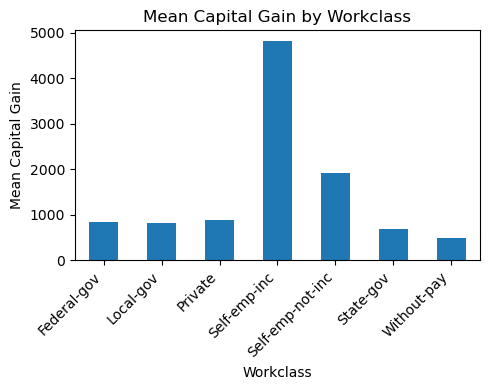

In [23]:
capital_gain_mean = cendf.groupby('workclass')['capital-gain'].mean()

# Plot the mean 'capital-gain' grouped by 'workclass'
plt.figure(figsize=(5, 4))
capital_gain_mean.plot(kind='bar')
plt.title('Mean Capital Gain by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Mean Capital Gain')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig('mean_capital_gain_by_workclass.png')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

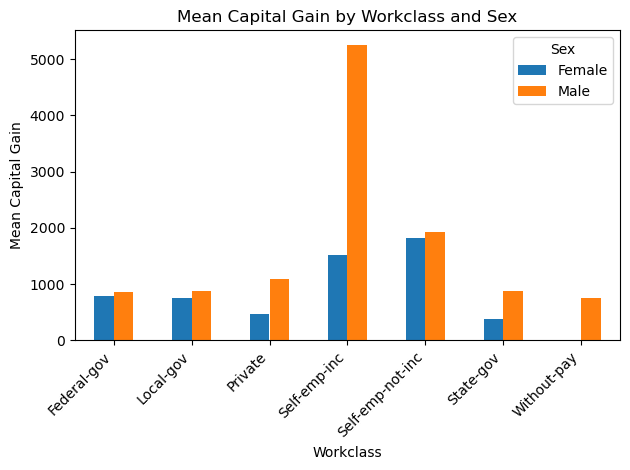

In [24]:
capital_gain_mean = cendf.groupby(['workclass', 'sex'])['capital-gain'].mean()

# Plot the mean 'capital-gain' grouped by 'workclass' and 'sex'
plt.figure(figsize=(10, 6))
capital_gain_mean.unstack().plot(kind='bar')
plt.title('Mean Capital Gain by Workclass and Sex')
plt.xlabel('Workclass')
plt.ylabel('Mean Capital Gain')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

In [25]:
Census_GT50K = cendf[cendf['annual_income'] == '>50K']
Census_GT50K

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


### The percentage of people from the United States who are private employees and earn less than 50,000 annually.

In [26]:
len(cendf[(cendf['native-country'] == 'United-States') &(cendf['workclass'] == 'Private')& (cendf['annual_income'] == '<=50K')])/len(cendf) * 100

51.70081559578277

###  The percentage of married people in the census data.

In [27]:
cendf['marital-status'].isin(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']).sum() /len(cendf) * 100

47.92785624295471

### The percentage of high school graduates earning more than 50,000 annually.

In [28]:
len(cendf[(cendf['education'] == 'HS-grad') &(cendf['annual_income']== '>50K')]) /len(cendf) * 100

5.361050328227571

In [29]:
# encoding categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
col_list = list(cendf.columns)
labelencoder = LabelEncoder()
for i in col_list:
    cendf[i]=labelencoder.fit_transform(cendf[i])

### Linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is "education-num"

In [30]:
lr = cendf.iloc[:,4:13:8]

In [31]:
Ind = lr.loc[:,['education-num']]
Dep = lr.iloc[:,-1]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(Ind,Dep,train_size=0.70,random_state=0)
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = LinReg.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred,y_test,squared=False)
rmse

11.838788573399603

## Logistic regression model where the dependent variable is “X”(yearly income) and the independent variable is “occupation”.

In [35]:
x1 = cendf.loc[:,['occupation']]
y1 = cendf.loc[:,['annual_income']]

In [36]:
x1.shape

(30162, 1)

In [37]:
y1.shape

(30162, 1)

In [38]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,train_size= 0.65,random_state=0)

In [39]:
log_reg = LogisticRegression()

In [40]:
log_reg.fit(x1_train,y1_train)

LogisticRegression()

In [41]:
y1_predict = log_reg.predict(x1_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y1_test,y1_predict)

array([[7921,    0],
       [2636,    0]], dtype=int64)

In [43]:
accuracy_score(y1_test,y1_predict)

0.750307852609643

### A logistic regression model where the dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”

In [44]:
log_reg1 = LogisticRegression()

In [45]:
x2 = cendf.loc[:,['age','workclass','education']]
y2 = cendf.loc[:,['annual_income']]

In [46]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x1,y1,train_size= 0.80,random_state=0)

In [47]:
log_reg1.fit(x2_train,y2_train)

LogisticRegression()

In [48]:
y2_pred = log_reg1.predict(x2_test)

In [49]:
confusion_matrix(y2_test,y2_pred)

array([[4532,    0],
       [1501,    0]], dtype=int64)

In [50]:
accuracy_score(y2_test,y2_pred)

0.7512017238521466

## Decision tree model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables.

In [51]:
x = cendf.drop(['annual_income'],axis=1)

In [52]:
y = cendf.loc[:,'annual_income']

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.70,random_state = 0)

In [54]:
DTree = DecisionTreeClassifier()

In [55]:
DTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred = DTree.predict(x_test)

In [57]:
confusion_matrix(y_test,y_pred)

array([[5868,  896],
       [ 871, 1414]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred)

0.804729804398276

## Random forest model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables and number of trees as 300.

In [59]:
x3 = cendf.drop(['annual_income'],axis=1)
y3 = cendf.loc[:,'annual_income']

In [60]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,train_size = 0.80,random_state = 0)

In [61]:
Rtree = RandomForestClassifier(n_estimators = 300)

In [62]:
Rtree.fit(x3_train,y3_train)

RandomForestClassifier(n_estimators=300)

In [63]:
y3_pred = Rtree.predict(x3_test)

In [64]:
confusion_matrix(y3_test,y3_pred)

array([[4223,  309],
       [ 570,  931]], dtype=int64)

In [65]:
accuracy_score(y3_test,y3_pred)

0.8543013426156141

## Time series analysis on population dataset

In [66]:
TSA = pd.read_csv(r"C:\Users\tharu\Downloads\popdata.csv",parse_dates = ['date'], index_col = 'date')

In [67]:
TSA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
dtypes: float64(1)
memory usage: 12.8 KB


In [68]:
TSA

,value
date,
1952-01-01,127299.000
1952-02-01,127517.000
1952-03-01,127721.000
1952-04-01,127933.000
1952-05-01,128130.000
...,...
2019-08-01,300581.333
2019-09-01,300775.872
2019-10-01,300972.035


In [69]:
TSA.describe().T

,count,mean,std,min,25%,50%,75%,max
value,816.0,214837.767826,50519.140567,127299.0,172715.25,210547.5,260354.25,301299.946


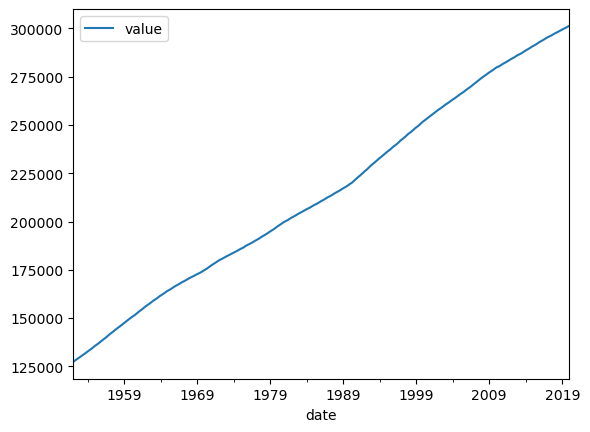

In [70]:
TSA.plot()
plt.show()

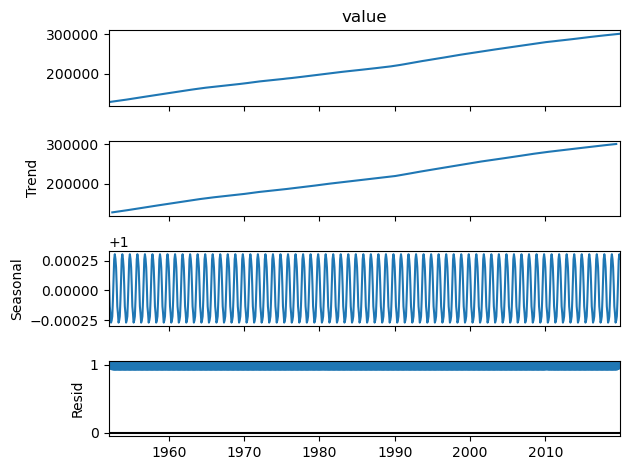

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(TSA['value'], model='multiplicative')
result.plot()
plt.show()

In [72]:
#This will create a line plot of the data, showing the population values over time. 
#From the plot we can see that the #population is increasing over time, indicating a trend.

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit an exponential smoothing model to the data
model = ExponentialSmoothing(TSA, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Make predictions for the next 6 months
predictions = fit.forecast(6)
print(predictions)

2020-01-01    301449.327838
2020-02-01    301578.012956
2020-03-01    301700.231089
2020-04-01    301832.864963
2020-05-01    301981.689830
2020-06-01    302151.696593
Freq: MS, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


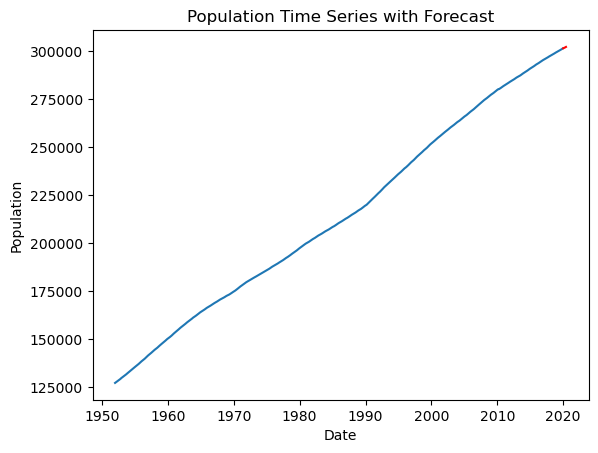

In [74]:
# Plot the original data and the predictions
plt.plot(TSA)
plt.plot(predictions, color='red')
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Population Time Series with Forecast')
plt.show()